# Analysis of One Aircraft

Query data about one icao24 (a unique aircraft)

In [1]:
import pandas as pd
import os
import requests
import geopy.distance

In [2]:
# API endpoint
api_url = "http://127.0.0.1:5000/api/v1.0/aircrafts-data/icao24/"

# Select one icao24 address (a unique aircraft)
icao24 = 'abb775'

## Query From Database

In [3]:
import datetime
from datetime import datetime
import mysql.connector
# import database_credentials as dbkeys
import os
import json

with open("/etc/config.json") as config_file:
    config = json.load(config_file)


# Variables:
database_name = "project_2"  # the name of the target database
table_name = "aircraft_data"



# Create a function to connect to the MYSQL server
def database_connect(hostname, username, password, database=database_name):
    mydb = mysql.connector.connect(
        host=hostname,
        user=username,
        passwd=password,
        database=database
    )
    return mydb



# Return an object containing the MYSQL connection
mydb = database_connect(
    config.get("MYSQL_HOSTNAME"),
    config.get("MYSQL_USERNAME"),
    config.get("MYSQL_PASSWORD")
    )
print(mydb)


# Create the cursor to manipute databases
my_cursor = mydb.cursor()
# Add unique constraint

query_string = f"""
                    SELECT 
                        *
                    FROM
                        {database_name}.{table_name}
                    WHERE
                        longitude IS NOT NULL
                    AND
                        icao24 = '{icao24}';
                    """

print(query_string)

my_cursor.execute(query_string)
icao_data = []
for records in my_cursor:
    icao_data.append(records)




                    SELECT 
                        *
                    FROM
                        project_2.aircraft_data
                    WHERE
                        longitude IS NOT NULL
                    AND
                        icao24 = 'abb775';
                    


In [15]:
# Query result using from database
# Note the result is a list of tuples
icao_data

[(216747,
  'abb775',
  'DAL55',
  'United States',
  1607242800,
  1607242800,
  -73.1059,
  36.9386,
  12192.0,
  0,
  214.52,
  269.86,
  0.0,
  None,
  12268.2,
  None,
  0,
  0,
  1607242800),
 (218632,
  'abb775',
  'DAL55',
  'United States',
  1607243099,
  1607243099,
  -73.8197,
  36.9364,
  12192.0,
  0,
  210.43,
  269.16,
  0.0,
  None,
  12268.2,
  None,
  0,
  0,
  1607243100),
 (220526,
  'abb775',
  'DAL55',
  'United States',
  1607243400,
  1607243400,
  -74.526,
  36.9274,
  12192.0,
  0,
  207.34,
  269.29,
  0.0,
  None,
  12275.8,
  None,
  0,
  0,
  1607243400),
 (222435,
  'abb775',
  'DAL55',
  'United States',
  1607243699,
  1607243700,
  -75.2202,
  36.9178,
  12192.0,
  0,
  207.36,
  268.86,
  0.0,
  None,
  12275.8,
  None,
  0,
  0,
  1607243700),
 (224409,
  'abb775',
  'DAL55',
  'United States',
  1607244000,
  1607244000,
  -75.9161,
  36.8996,
  12192.0,
  0,
  205.89,
  268.14,
  -0.33,
  None,
  12275.8,
  None,
  0,
  0,
  1607244000),
 (226394,

In [16]:
pd.read_sql(query_string)

TypeError: read_sql() missing 1 required positional argument: 'con'

## API configuration and query

In [5]:
# Build partial query URL
query_url = f"{api_url}{icao24}"

print(query_url)

#  Perform a request for data
response = requests.get(query_url).json()

http://127.0.0.1:5000/api/v1.0/aircrafts-data/icao24/abb775


In [6]:
# Response is a list of dictonaries
response

[{'baro_altitude': 12192.0,
  'callsign': 'DAL55',
  'geo_altitude': 12268.2,
  'icao24': 'abb775',
  'id': 216747,
  'last_contact': 1607242800,
  'latitude': 36.9386,
  'longitude': -73.1059,
  'on_ground': 0,
  'origin_country': 'United States',
  'position_source': 0,
  'sensors': None,
  'spi': 0,
  'squawk': None,
  'time': 1607242800,
  'time_position': 1607242800,
  'true_track': 269.86,
  'velocity': 214.52,
  'vertical_rate': 0.0},
 {'baro_altitude': 12192.0,
  'callsign': 'DAL55',
  'geo_altitude': 12268.2,
  'icao24': 'abb775',
  'id': 218632,
  'last_contact': 1607243099,
  'latitude': 36.9364,
  'longitude': -73.8197,
  'on_ground': 0,
  'origin_country': 'United States',
  'position_source': 0,
  'sensors': None,
  'spi': 0,
  'squawk': None,
  'time': 1607243100,
  'time_position': 1607243099,
  'true_track': 269.16,
  'velocity': 210.43,
  'vertical_rate': 0.0},
 {'baro_altitude': 12192.0,
  'callsign': 'DAL55',
  'geo_altitude': 12275.8,
  'icao24': 'abb775',
  'id': 

In [7]:
# Create a dataframe from the json response data
df = pd.DataFrame(response)
df

,baro_altitude,callsign,geo_altitude,icao24,id,last_contact,latitude,longitude,on_ground,origin_country,position_source,sensors,spi,squawk,time,time_position,true_track,velocity,vertical_rate
0,12192.00,DAL55,12268.20,abb775,216747,1607242800,36.9386,-73.1059,0,United States,0,None,0,None,1607242800,1607242800,269.86,214.52,0.00
1,12192.00,DAL55,12268.20,abb775,218632,1607243099,36.9364,-73.8197,0,United States,0,None,0,None,1607243100,1607243099,269.16,210.43,0.00
2,12192.00,DAL55,12275.80,abb775,220526,1607243400,36.9274,-74.5260,0,United States,0,None,0,None,1607243400,1607243400,269.29,207.34,0.00
3,12192.00,DAL55,12275.80,abb775,222435,1607243700,36.9178,-75.2202,0,United States,0,None,0,None,1607243700,1607243699,268.86,207.36,0.00
4,12192.00,DAL55,12275.80,abb775,224409,1607244000,36.8996,-75.9161,0,United States,0,None,0,None,1607244000,1607244000,268.14,205.89,-0.33
5,12192.00,DAL55,12283.40,abb775,226394,1607244300,36.6906,-76.5365,0,United States,0,None,0,None,1607244300,1607244300,233.24,208.04,0.00
6,12192.00,DAL55,12298.70,abb775,228413,1607244600,36.3525,-77.0945,0,United States,0,None,0,None,1607244600,1607244600,232.88,209.69,0.00
7,12192.00,DAL55,12321.50,abb775,230405,1607244899,36.0149,-77.6423,0,United States,0,None,0,None,1607244900,1607244899,232.65,207.74,0.33
8,12192.00,DAL55,12344.40,abb775,232370,1607245199,35.6794,-78.1932,0,United States,0,None,0,None,1607245199,1607245199,233.21,208.76,0.00
9,12192.00,DAL55,12367.30,abb775,234367,1607245499,35.3423,-78.7402,0,United States,0,None,0,7271,1607245500,1607245499,232.81,203.41,0.00


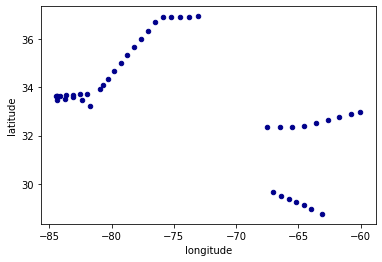

In [8]:
ax1 = df.plot.scatter(x='longitude',
                      y='latitude',
                      c='DarkBlue')


In [9]:
# Calculate the distance between two coordinates
df['distance_traveled'] = ''
for index,row in df.iterrows():
#     print((row['latitude'],row['longitude']))
    try:
        coords_1 = (df['latitude'].iloc[index],df['longitude'].iloc[index])
        coords_2 = ((df['latitude'].iloc[index+1],df['longitude'].iloc[index+1]))
        distance_km = round(geopy.distance.geodesic(coords_1, coords_2).km*10)/10
#         print(distance_km)
        df['distance_traveled'].iloc[index] = distance_km
    except:
        pass

/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df

,baro_altitude,callsign,geo_altitude,icao24,id,last_contact,latitude,longitude,on_ground,origin_country,position_source,sensors,spi,squawk,time,time_position,true_track,velocity,vertical_rate,distance_traveled
0,12192.00,DAL55,12268.20,abb775,216747,1607242800,36.9386,-73.1059,0,United States,0,None,0,None,1607242800,1607242800,269.86,214.52,0.00,63.6
1,12192.00,DAL55,12268.20,abb775,218632,1607243099,36.9364,-73.8197,0,United States,0,None,0,None,1607243100,1607243099,269.16,210.43,0.00,62.9
2,12192.00,DAL55,12275.80,abb775,220526,1607243400,36.9274,-74.5260,0,United States,0,None,0,None,1607243400,1607243400,269.29,207.34,0.00,61.9
3,12192.00,DAL55,12275.80,abb775,222435,1607243700,36.9178,-75.2202,0,United States,0,None,0,None,1607243700,1607243699,268.86,207.36,0.00,62
4,12192.00,DAL55,12275.80,abb775,224409,1607244000,36.8996,-75.9161,0,United States,0,None,0,None,1607244000,1607244000,268.14,205.89,-0.33,60
5,12192.00,DAL55,12283.40,abb775,226394,1607244300,36.6906,-76.5365,0,United States,0,None,0,None,1607244300,1607244300,233.24,208.04,0.00,62.5
6,12192.00,DAL55,12298.70,abb775,228413,1607244600,36.3525,-77.0945,0,United States,0,None,0,None,1607244600,1607244600,232.88,209.69,0.00,61.9
7,12192.00,DAL55,12321.50,abb775,230405,1607244899,36.0149,-77.6423,0,United States,0,None,0,None,1607244900,1607244899,232.65,207.74,0.33,62.1
8,12192.00,DAL55,12344.40,abb775,232370,1607245199,35.6794,-78.1932,0,United States,0,None,0,None,1607245199,1607245199,233.21,208.76,0.00,62.1
9,12192.00,DAL55,12367.30,abb775,234367,1607245499,35.3423,-78.7402,0,United States,0,None,0,7271,1607245500,1607245499,232.81,203.41,0.00,60.4


## Create Script

In [12]:
# Build partial query URL
query_url = f"{api_url}{icao24}"

#  Perform a request for data
response = requests.get(query_url).json()

# Create a dataframe from the json response data
df = pd.DataFrame(response)

# Calculate the distance between two coordinates
df['distance_traveled'] = ''
for index,row in df.iterrows():
#     print((row['latitude'],row['longitude']))
    try:
        coords_1 = (df['latitude'].iloc[index],df['longitude'].iloc[index])
        coords_2 = ((df['latitude'].iloc[index+1],df['longitude'].iloc[index+1]))
        distance_km = round(geopy.distance.geodesic(coords_1, coords_2).km*10)/10
        df['distance_traveled'].iloc[index] = distance_km
    except:
        pass

data_Dict = df.to_json(orient="records")

In [13]:
data_Dict

'[{"baro_altitude":12192.0,"callsign":"DAL55","geo_altitude":12268.2,"icao24":"abb775","id":216747,"last_contact":1607242800,"latitude":36.9386,"longitude":-73.1059,"on_ground":0,"origin_country":"United States","position_source":0,"sensors":null,"spi":0,"squawk":null,"time":1607242800,"time_position":1607242800,"true_track":269.86,"velocity":214.52,"vertical_rate":0.0,"distance_traveled":63.6},{"baro_altitude":12192.0,"callsign":"DAL55","geo_altitude":12268.2,"icao24":"abb775","id":218632,"last_contact":1607243099,"latitude":36.9364,"longitude":-73.8197,"on_ground":0,"origin_country":"United States","position_source":0,"sensors":null,"spi":0,"squawk":null,"time":1607243100,"time_position":1607243099,"true_track":269.16,"velocity":210.43,"vertical_rate":0.0,"distance_traveled":62.9},{"baro_altitude":12192.0,"callsign":"DAL55","geo_altitude":12275.8,"icao24":"abb775","id":220526,"last_contact":1607243400,"latitude":36.9274,"longitude":-74.526,"on_ground":0,"origin_country":"United State